# This code is a more advanced example of Cpx-Liquid melt matching
- It adapts the approach of Scruggs and Putirka, 2018 (https://doi.org/10.2138/am-2018-6058), where you have lots of whole rock compositions for basalts, lots for rhyolites, but nothing in between. 
- It uses a variety of mixing and sampling algorithms to add "synthetic liquids" you can the feed into the melt matching algoorithm
- We suggest you first go through the Cpx_MeltMatch1_Gleeson2020 tutorial for an introduction to the melt matching code

#### You need to install Thermobar once on your machine, if you haven't done this yet, uncomment the line below (remove the #)

In [ ]:
#!pip install Thermobar

## Load python things

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
pd.options.display.max_columns = None

## This sets plotting parameters

In [2]:
# This sets some plotting things
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1 
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

# Load in data
- First sheet, "Liquids" has whole-rock data
- Second sheet, "Cpxs" has clinopyroxene data
- The function "import excel" pulls out the liquids, and cpxs in a format ready to feed into the later functions. All other inputs are stored in "my_input" (E.g., any other columns you had)

In [3]:
out=pt.import_excel('Scruggs_Input.xlsx', sheet_name="Liquids")
my_input=out['my_input']
myLiquids1=out['Liqs']

out2=pt.import_excel('Scruggs_Input.xlsx', sheet_name="Cpxs")
my_input2=out2['my_input']
myCpxs1=out2['Cpxs']

## Inspect data to check it has read in correctly.
- .head() displays the first N columns. Check for any columns which are all zero's which you think you entered data for. Check column headings in excel

In [4]:
display(myLiquids1.head())
display(myCpxs1.head())

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,69.67,0.360,15.690,2.645412,0.07,1.36,3.270,4.14,2.67,0.0,0.120,0.0,0.0,0.0,0.0,0.0,0
1,69.34,0.375,15.575,2.627416,0.06,1.39,3.255,4.19,2.69,0.0,0.120,0.0,0.0,0.0,0.0,0.0,1
2,56.14,0.770,18.680,6.658520,0.12,4.08,8.080,3.23,1.24,0.0,0.240,0.0,0.0,0.0,0.0,0.0,2
3,56.11,0.770,18.710,6.631526,0.12,4.17,8.000,3.19,1.28,0.0,0.236,0.0,0.0,0.0,0.0,0.0,3
4,57.94,0.570,18.090,6.073650,0.12,3.97,7.730,3.21,1.44,0.0,0.106,0.0,0.0,0.0,0.0,0.0,4


,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,47.558,0.880,7.697,8.230,0.183,13.257,21.465,0.244,0,0.034,0
1,50.643,0.548,4.410,7.811,0.190,16.048,19.995,0.182,0,0.031,1
2,47.000,1.280,8.458,7.998,0.176,13.159,21.713,0.240,0,0.041,2
3,51.328,0.391,2.756,12.116,0.651,15.586,16.798,0.195,0,0.000,3
4,50.770,0.416,2.910,11.054,0.593,14.724,19.081,0.218,0,0.010,4


## This section calculates melt matching using just the measured liquids and clinopyroxenes
- here, we have specified to use the barometer of Neave and Putirka, 2017, and the thermometer of Putirka (2008) eq 33
- We are using the default equilibrium filters for DiHd, CaTs and EnFs errors from Neave and Putirka (2017)
- And overwriting the default for Kd to 0.27, KdErr=0.03 following Scruggs and Putirka
- Add water based on SiO2 content

In [5]:
melt_match_out=pt.calculate_cpx_liq_press_temp_matching(liq_comps=myLiquids1, cpx_comps=myCpxs1, equationP="P_Neave2017",
                                                     equationT="T_Put2008_eq33", Kd_Match=0.27, Kd_Err=0.03, 
                                                        H2O_Liq=myLiquids1['SiO2_Liq']*0.06995+0.383)
Meas_Avs=melt_match_out['Av_PTs']
Meas_All=melt_match_out['All_PTs']

Considering 27456 Liq-Cpx pairs, be patient if this is >>1 million!
the code is evaluating Kd matches using Kd=0.27
4986 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!


# However, are the measured liquids really representative of all measured liquids at depth?
- As Scruggs and Putrika (2018) showed, measured liquids have a clear Daly gap, and it is probably some cpxs crystallized from liquids between the analsed mafic and silicic end members
- They use a mixing model to generate liquids lying between these two extremes to then feed into the Cpx-Liq spreadsheet (see https://www.youtube.com/watch?v=CjKvgXrah_k&list=PLnOXMT9X-AL_No_vUkkx8tYrahGQ1X4Kh&index=2&t=13s)
- Here, we say, take liquids with SiO2_Liq>65 wt% (e.g., our evolved end member), add some noise to account for the silicic liquids we did not sample, in this case, 1% noise distributed normally, and 5 synthetic samples per measured sample. This will be important if there are relatively large gaps between measured samples. We do the same to create a mafic end member, using a SiO2 and MgO filter

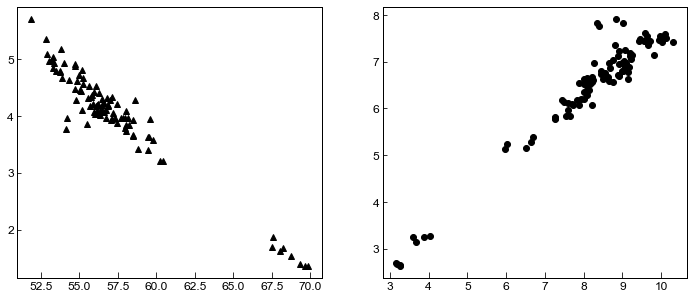

In [6]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(myLiquids1['SiO2_Liq'], myLiquids1['MgO_Liq'], '^k', markerfacecolor='k', label='Measured Liquids')
ax2.plot(myLiquids1['CaO_Liq'], myLiquids1['FeOt_Liq'], 'ok', markerfacecolor='k', label='Measured Liquids')


In [7]:
Sil_endmember_noise1=pt.add_noise_sample_1phase(phase_comp=myLiquids1,  duplicates=5, filter_q='SiO2_Liq > 65',
                     phase_err_type="Perc", noise_percent=1, err_dist="normal", append=True)

Maf_endmember_noise1=pt.add_noise_sample_1phase(phase_comp=myLiquids1, duplicates=5, filter_q='SiO2_Liq < 53.8 & MgO_Liq>4', 
                     phase_err_type="Perc", noise_percent=1, err_dist="normal", append=True)


All negative numbers replaced with zeros. If you wish to keep these, set positive=False
All negative numbers replaced with zeros. If you wish to keep these, set positive=False


## We can plot these synthetic liquids, and see they cluster around measured liquid

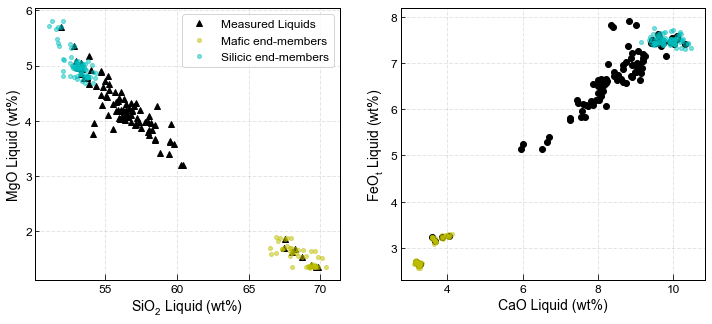

In [8]:

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(myLiquids1['SiO2_Liq'], myLiquids1['MgO_Liq'], '^k', markerfacecolor='k', label='Measured Liquids')
ax1.plot(Sil_endmember_noise1['SiO2_Liq'], Sil_endmember_noise1['MgO_Liq'], 'oy', markeredgecolor='y', label='Mafic end-members',  markersize=4, alpha=0.5)
ax1.plot(Maf_endmember_noise1['SiO2_Liq'], Maf_endmember_noise1['MgO_Liq'], 'oc', markeredgecolor='c', label='Silicic end-members',  markersize=4, alpha=0.5)
ax1.set_xlabel('SiO$_2$ Liquid (wt%)')
ax1.set_ylabel('MgO Liquid (wt%)')
ax1.legend()
ax2.plot(myLiquids1['CaO_Liq'], myLiquids1['FeOt_Liq'], 'ok', markerfacecolor='k', label='Measured Liquids')
ax2.plot(Sil_endmember_noise1['CaO_Liq'], Sil_endmember_noise1['FeOt_Liq'], 'oy', markeredgecolor='y', label='Mafic end-members',  markersize=4, alpha=0.5)
ax2.plot(Maf_endmember_noise1['CaO_Liq'], Maf_endmember_noise1['FeOt_Liq'], 'oc', markeredgecolor='c', label='Silicic end-members',  markersize=4, alpha=0.5)
ax2.set_xlabel('CaO Liquid (wt%)')
ax2.set_ylabel('FeO$_t$ Liquid (wt%)')
ax1.grid(color = 'k', linestyle = '--', linewidth = 1, alpha = 0.1)
ax2.grid(color = 'k', linestyle = '--', linewidth = 1, alpha = 0.1)
fig.savefig('EndMembers.svg', dpi=300, transparent=True)

# There are now a number of ways to mix these end-members to incorperate the liquid line of descent. 

### Option 1 - Mixing by bootstrapping, with no self mixing. 
- Takes end member 1 (Sil_endmember_noise1) and and end member 2 (Maf_endmember_noise1). Makes each input the length of the number of samples you specify with number samples. E.g., say when you generate your end member 1, you end up with 2000 samples. if you enter num_samples=500, it will randomly sample down to 500 samples. Conversely, if your end member only has 80 samples, it will scale it up by randomly resampling until you have 500 inputs. 
- Basically, if you generate more samples at the "end member" stage, they are generated with noise. If you generate more here, they are randomly sampled without adding noise. 
- The code then randomly mixes each element of end member 1 with end member 2 in a proportion determined by a random number generator between 0 and 1.

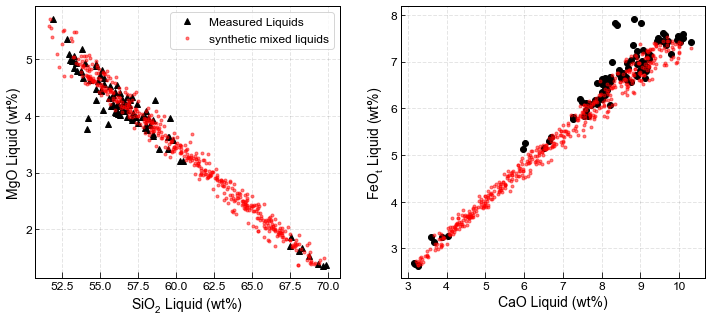

In [9]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))

Mixed_noise5=pt.calculate_bootstrap_mixes(Sil_endmember_noise1, Maf_endmember_noise1, num_samples = 500, self_mixing = False)

ax1.plot(myLiquids1['SiO2_Liq'], myLiquids1['MgO_Liq'], '^k', label='Measured Liquids')
ax1.plot(Mixed_noise5['SiO2_Liq'], Mixed_noise5['MgO_Liq'], 'or', markerfacecolor='r', markersize=3, label='synthetic mixed liquids',  alpha=0.5)
ax1.set_xlabel('SiO$_2$ Liquid (wt%)')
ax1.set_ylabel('MgO Liquid (wt%)')
ax1.legend()
ax2.plot(myLiquids1['CaO_Liq'], myLiquids1['FeOt_Liq'], 'ok', label='Measured Liquids')
ax2.plot(Mixed_noise5['CaO_Liq'], Mixed_noise5['FeOt_Liq'], 'or', markerfacecolor='r', markersize=3,  alpha=0.5)

ax2.set_xlabel('CaO Liquid (wt%)')
ax2.set_ylabel('FeO$_t$ Liquid (wt%)')
ax1.grid(color = 'k', linestyle = '--', linewidth = 1, alpha = 0.1)
ax2.grid(color = 'k', linestyle = '--', linewidth = 1, alpha = 0.1)

### Option 2 - Using self mixing
- This will not only mix silicic and mafic end member, it will also mix between mafic end members, and between silic end-members. 
- This will cluster more liquids around where you have defined your end members, with more sparse coverage inbetween. 

Text(0, 0.5, 'MgO Liquid')

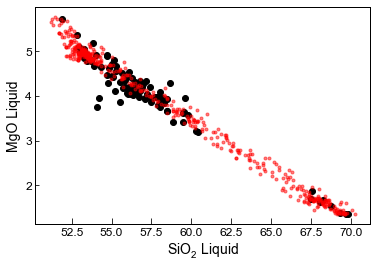

In [10]:
Mixed_noise5_self=pt.calculate_bootstrap_mixes(Sil_endmember_noise1, Maf_endmember_noise1, num_samples = 500, self_mixing = True)

plt.plot(myLiquids1['SiO2_Liq'], myLiquids1['MgO_Liq'], 'ok', label='Measured Liquids')
plt.plot(Mixed_noise5_self['SiO2_Liq'], Mixed_noise5_self['MgO_Liq'], 'or', markerfacecolor='r', markersize=3,  alpha=0.5)
plt.xlabel('SiO$_2$ Liquid')
plt.ylabel('MgO Liquid')

# If you want more even coverage in the middle, but some mixing at the edges, can use the keyword self_mixing=Partial
- This will give half your liquids from self mixing, half from non-self mixing

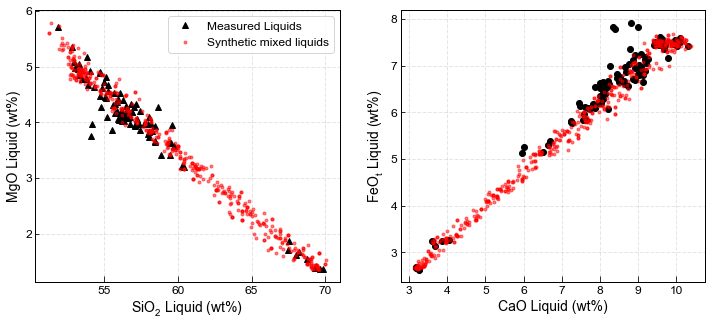

In [11]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5))
Mixed_noise1_selfbig=pt.calculate_bootstrap_mixes(endmember1=Sil_endmember_noise1, endmember2=Maf_endmember_noise1, 
                                                  num_samples = 500, self_mixing = "Partial")
ax1.plot(myLiquids1['SiO2_Liq'], myLiquids1['MgO_Liq'], '^k', label='Measured Liquids')
ax1.plot(Mixed_noise1_selfbig['SiO2_Liq'], Mixed_noise1_selfbig['MgO_Liq'], 'or', markerfacecolor='r', markersize=3, label='Synthetic mixed liquids',  alpha=0.5)
ax1.set_xlabel('SiO$_2$ Liquid (wt%)')
ax1.set_ylabel('MgO Liquid (wt%)')
ax1.legend()
ax2.plot(myLiquids1['CaO_Liq'], myLiquids1['FeOt_Liq'], 'ok', label='Measured Liquids')
ax2.plot(Mixed_noise1_selfbig['CaO_Liq'], Mixed_noise1_selfbig['FeOt_Liq'], 'or', markerfacecolor='r', markersize=3,  alpha=0.5)

ax2.set_xlabel('CaO Liquid (wt%)')
ax2.set_ylabel('FeO$_t$ Liquid (wt%)')
ax1.grid(color = 'k', linestyle = '--', linewidth = 1, alpha = 0.1)
ax2.grid(color = 'k', linestyle = '--', linewidth = 1, alpha = 0.1)
fig.savefig('Mixing_EndMembers.svg', dpi=300)

# Now want to use these synthetic "partially-mixed" liquids for melt matching

## First, lets combine these synthetic liquids with all measured liquids to get an even bigger dataset

In [12]:
Liq_Comp=pd.concat([Mixed_noise1_selfbig.reset_index(drop=True), 
                    myLiquids1.reset_index(drop=True)], axis=0).reset_index(drop=True).fillna(0)

## Now, following Scruggs and Putirka (2018), lets allocate H2O as a function of SiO2 content in the melt

In [13]:
Liq_Comp['H2O_Liq']=Liq_Comp['SiO2_Liq']*0.06995+0.383

## Now lets do melt matching
- Uses fixed Kd of 0.27, +-0.03 following scruggs and Putirka

In [14]:
melt_match_out_syn=pt.calculate_cpx_liq_press_temp_matching(liq_comps=Liq_Comp, cpx_comps=myCpxs1, 
                                                    equationP="P_Neave2017", equationT="T_Put2008_eq33",
                                                    Kd_Match=0.27, Kd_Err=0.03)
Syn_Avs=melt_match_out_syn['Av_PTs']
Syn_All=melt_match_out_syn['All_PTs']

Considering 170456 Liq-Cpx pairs, be patient if this is >>1 million!
the code is evaluating Kd matches using Kd=0.27
31731 Matches remaining after initial Kd filter. Now moving onto iterative calculations
Finished calculating Ps and Ts, now just averaging the results. Almost there!
Done!


### Lets take a look at the average matches

In [15]:
Syn_Avs

,Sample_ID_Cpx,# of Liqs Averaged,Mean_T_K_calc,Std_T_K_calc,Mean_P_kbar_calc,Std_P_kbar_calc,ID_CPX,Mean_Delta_Kd_Put2008,Mean_Delta_Kd_Mas2013,Mean_Delta_EnFs_Mollo13,Mean_Delta_EnFs_Put1999,Mean_Delta_CaTs_Put1999,Mean_Delta_DiHd_Mollo13,Mean_Delta_DiHd_Put1999,Mean_Delta_CrCaTs_Put1999,Mean_Delta_CaTi_Put1999,Mean_DeltaKd_userselected=0.27,Mean_SiO2_Liq,Mean_TiO2_Liq,Mean_Al2O3_Liq,Mean_FeOt_Liq,Mean_MnO_Liq,Mean_MgO_Liq,Mean_CaO_Liq,Mean_Na2O_Liq,Mean_K2O_Liq,Mean_Cr2O3_Liq,Mean_P2O5_Liq,Mean_H2O_Liq,Mean_Fe3Fet_Liq,Mean_NiO_Liq,Mean_CoO_Liq,Mean_CO2_Liq,Mean_SiO2_Liq_mol_frac,Mean_MgO_Liq_mol_frac,Mean_MnO_Liq_mol_frac,Mean_FeOt_Liq_mol_frac,Mean_CaO_Liq_mol_frac,Mean_Al2O3_Liq_mol_frac,Mean_Na2O_Liq_mol_frac,Mean_K2O_Liq_mol_frac,Mean_TiO2_Liq_mol_frac,Mean_P2O5_Liq_mol_frac,Mean_Cr2O3_Liq_mol_frac,Mean_SiO2_Liq_cat_frac,Mean_MgO_Liq_cat_frac,Mean_MnO_Liq_cat_frac,Mean_FeOt_Liq_cat_frac,Mean_CaO_Liq_cat_frac,Mean_Al2O3_Liq_cat_frac,Mean_Na2O_Liq_cat_frac,Mean_K2O_Liq_cat_frac,Mean_TiO2_Liq_cat_frac,Mean_P2O5_Liq_cat_frac,Mean_Cr2O3_Liq_cat_frac,Mean_FeO_Liq_cat_frac,Mean_Mg_Number_Liq_NoFe3,Mean_Mg_Number_Liq_Fe3,Mean_ID_Liq,Mean_SiO2_Cpx,Mean_TiO2_Cpx,Mean_Al2O3_Cpx,Mean_FeOt_Cpx,Mean_MnO_Cpx,Mean_MgO_Cpx,Mean_CaO_Cpx,Mean_Na2O_Cpx,Mean_K2O_Cpx,Mean_Cr2O3_Cpx,Mean_SiO2_Cpx_cat_6ox,Mean_MgO_Cpx_cat_6ox,Mean_FeOt_Cpx_cat_6ox,Mean_CaO_Cpx_cat_6ox,Mean_Al2O3_Cpx_cat_6ox,Mean_Na2O_Cpx_cat_6ox,Mean_K2O_Cpx_cat_6ox,Mean_MnO_Cpx_cat_6ox,Mean_TiO2_Cpx_cat_6ox,Mean_Cr2O3_Cpx_cat_6ox,Mean_oxy_renorm_factor,Mean_Al_IV_cat_6ox,Mean_Al_VI_cat_6ox,Mean_Cation_Sum_Cpx,Mean_Ca_CaMgFe,Mean_Lindley_Fe3_Cpx,Mean_Lindley_Fe2_Cpx,Mean_Lindley_Fe3_Cpx_prop,Mean_CrCaTs,Mean_a_cpx_En,Mean_Mgno_Cpx,Mean_Jd,Mean_CaTs,Mean_CaTi,Mean_DiHd_1996,Mean_EnFs,Mean_DiHd_2003,Mean_Di_Cpx,Mean_FeIII_Wang21,Mean_FeII_Wang21,Mean_Kd_Fe_Mg_Fe2,Mean_Kd_Fe_Mg_Fe2_Lind,Mean_Kd_Fe_Mg_Fet,Mean_lnK_Jd_liq,Mean_lnK_Jd_DiHd_liq_1996,Mean_lnK_Jd_DiHd_liq_2003,Mean_Kd_Fe_Mg_IdealWB,Mean_Mgno_Liq_noFe3,Mean_Mgno_Liq_Fe2,Mean_DeltaFeMg_WB,Mean_T_Liq_MinP,Mean_T_Liq_MaxP,Mean_Kd_Ideal_Put,Mean_Kd_Ideal_Masotta,Mean_Delta_Kd_Put2008_I_M,Mean_DiHd_Pred_Put1999,Mean_Delta_DiHd_I_M_Put1999,Mean_DiHd_Pred_P2008,Mean_Delta_DiHd_P2008,Mean_DiHd_Pred_Mollo13,Mean_Delta_DiHd_I_M_Mollo13,Mean_EnFs_Pred_Put1999,Mean_Delta_EnFs_I_M_Put1999,Mean_EnFs_Pred_Mollo13,Mean_Delta_EnFs_I_M_Mollo13,Mean_CaTs_Pred_Put1999,Mean_Delta_CaTs_I_M_Put1999,Mean_CrCaTs_Pred_Put1999,Mean_Delta_CrCaTs_I_M_Put1999,Mean_CaTi_Pred_Put1999,Mean_Delta_CaTi_I_M_Put1999,Mean_Jd_Pred_Put1999,Mean_Delta_Jd_Put1999,Mean_Delta_Jd_I_M_Put1999,Mean_DeltaKd_Kd_Match_userSp,Std_Delta_Kd_Put2008,Std_Delta_Kd_Mas2013,Std_Delta_EnFs_Mollo13,Std_Delta_EnFs_Put1999,Std_Delta_CaTs_Put1999,Std_Delta_DiHd_Mollo13,Std_Delta_DiHd_Put1999,Std_Delta_CrCaTs_Put1999,Std_Delta_CaTi_Put1999,Std_DeltaKd_userselected=0.27,Std_SiO2_Liq,Std_TiO2_Liq,Std_Al2O3_Liq,Std_FeOt_Liq,Std_MnO_Liq,Std_MgO_Liq,Std_CaO_Liq,Std_Na2O_Liq,Std_K2O_Liq,Std_Cr2O3_Liq,Std_P2O5_Liq,Std_H2O_Liq,Std_Fe3Fet_Liq,Std_NiO_Liq,Std_CoO_Liq,Std_CO2_Liq,Std_SiO2_Liq_mol_frac,Std_MgO_Liq_mol_frac,Std_MnO_Liq_mol_frac,Std_FeOt_Liq_mol_frac,Std_CaO_Liq_mol_frac,Std_Al2O3_Liq_mol_frac,Std_Na2O_Liq_mol_frac,Std_K2O_Liq_mol_frac,Std_TiO2_Liq_mol_frac,Std_P2O5_Liq_mol_frac,Std_Cr2O3_Liq_mol_frac,Std_SiO2_Liq_cat_frac,Std_MgO_Liq_cat_frac,Std_MnO_Liq_cat_frac,Std_FeOt_Liq_cat_frac,Std_CaO_Liq_cat_frac,Std_Al2O3_Liq_cat_frac,Std_Na2O_Liq_cat_frac,Std_K2O_Liq_cat_frac,Std_TiO2_Liq_cat_frac,Std_P2O5_Liq_cat_frac,Std_Cr2O3_Liq_cat_frac,Std_FeO_Liq_cat_frac,Std_Mg_Number_Liq_NoFe3,Std_Mg_Number_Liq_Fe3,Std_ID_Liq,Std_SiO2_Cpx,Std_TiO2_Cpx,Std_Al2O3_Cpx,Std_FeOt_Cpx,Std_MnO_Cpx,Std_MgO_Cpx,Std_CaO_Cpx,Std_Na2O_Cpx,Std_K2O_Cpx,Std_Cr2O3_Cpx,Std_SiO2_Cpx_cat_6ox,Std_MgO_Cpx_cat_6ox,Std_FeOt_Cpx_cat_6ox,Std_CaO_Cpx_cat_6ox,Std_Al2O3_Cpx_cat_6ox,Std_Na2O_Cpx_cat_6ox,Std_K2O_Cpx_cat_6ox,Std_MnO_Cpx_cat_6ox,Std_TiO2_Cpx_cat_6ox,Std_Cr2O3_Cpx_cat_6ox,Std_oxy_renorm_factor,Std_Al_IV_cat_6

## Lets plot all matches for both scenarios
- e.g., just using measured liquids, and using these synthetic liquids as well

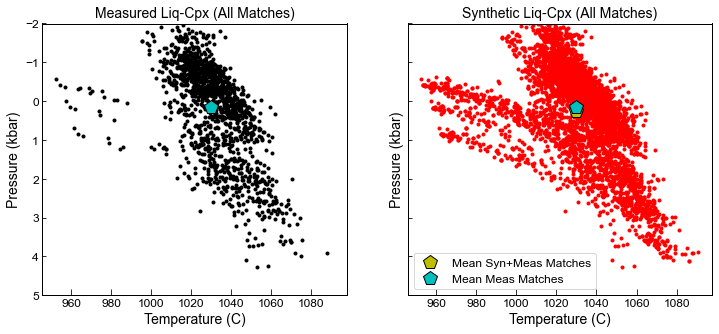

In [16]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)
ax1.set_title('Measured Liq-Cpx (All Matches)')
ax1.plot(Meas_All['T_K_calc']-273.15, Meas_All['P_kbar_calc'], '.k')
ax1.plot(np.nanmean(Meas_All['T_K_calc']-273.15), np.nanmean(Meas_All['P_kbar_calc']), 'pk',
        mfc='c', ms=15, label="Mean Meas Matches")

#ax1.set_ylim([-2, 5])
ax1.invert_yaxis()

#ax1.set_xlim([700, 1200])
ax1.set_xlabel('Temperature (C)')
ax1.set_ylabel('Pressure (kbar)')
ax2.set_title('Synthetic Liq-Cpx (All Matches)')
ax2.plot(Syn_All['T_K_calc']-273.15, Syn_All['P_kbar_calc'], '.r')

ax2.plot(np.nanmean(Syn_All['T_K_calc']-273.15), np.nanmean(Syn_All['P_kbar_calc']), 'pk',
        mfc='y', ms=15,label="Mean Syn+Meas Matches")
ax2.plot(np.nanmean(Meas_All['T_K_calc']-273.15), np.nanmean(Meas_All['P_kbar_calc']), 'pk',
        mfc='c', ms=15, label="Mean Meas Matches")

ax2.set_ylim([-2, 5])
ax2.invert_yaxis()
#ax2.set_xlim([700, 1200])

ax2.set_xlabel('Temperature (C)')
ax2.set_ylabel('Pressure (kbar)')
ax2.legend()

## Plotting average for each Cpx, with all matches underlain for synthetic liquid-cpx matching

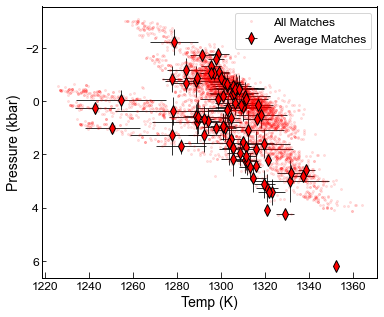

In [17]:
fig, (ax1) = plt.subplots(1, 1, figsize=(6, 5))
ax1.plot(Syn_All['T_K_calc'],  Syn_All['P_kbar_calc'], 'or',
         ms=2, mfc='red', alpha=0.1, label='All Matches')
ax1.errorbar(Syn_Avs['Mean_T_K_calc'],  Syn_Avs['Mean_P_kbar_calc'],
             xerr=Syn_Avs['Std_T_K_calc'], 
             yerr=Syn_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, 
             mfc='red', ms=8, mec='k', label='Average Matches')
ax1.invert_yaxis()
ax1.set_xlabel('Temp (K)')
ax1.set_ylabel('Pressure (kbar)')
ax1.legend()
fig.savefig('AllMatches_PT.png', dpi=300)

## Plotting only the average for each Cpx (e.g., Cpx1-Liq1, Cpx1-Liq10)

Text(0, 0.5, 'Pressure (kbar)')

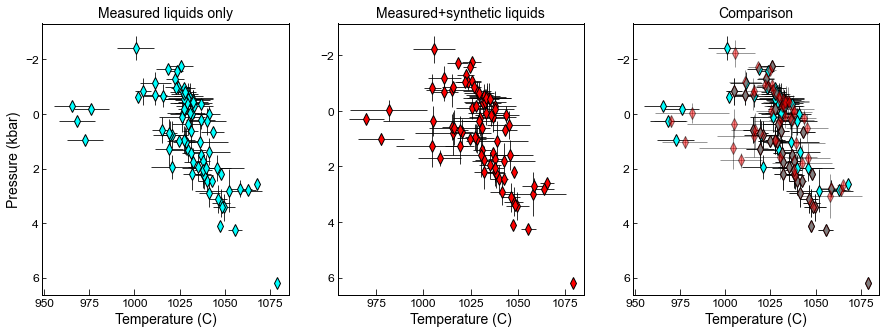

In [18]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15, 5))#, sharex=True, sharey=True)
ax1.set_title('Measured liquids only')
ax1.errorbar(Meas_Avs['Mean_T_K_calc']-273.15,  Meas_Avs['Mean_P_kbar_calc'],
             xerr=Meas_Avs['Std_T_K_calc'], yerr=Meas_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=8, mec='k', label='Pennys code')
ax1.invert_yaxis()

ax2.set_title('Measured+synthetic liquids')
ax2.errorbar(Syn_Avs['Mean_T_K_calc']-273.15,  Syn_Avs['Mean_P_kbar_calc'],
             xerr=Syn_Avs['Std_T_K_calc'], yerr=Syn_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='red', ms=8, mec='k', label='Pennys code')
ax2.invert_yaxis()

ax3.set_title('Comparison')
ax3.errorbar(Meas_Avs['Mean_T_K_calc']-273.15,  Meas_Avs['Mean_P_kbar_calc'],
             xerr=Meas_Avs['Std_T_K_calc'], yerr=Meas_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=8, mec='k', label='Pennys code')
ax3.errorbar(Syn_Avs['Mean_T_K_calc']-273.15,  Syn_Avs['Mean_P_kbar_calc'],
             xerr=Syn_Avs['Std_T_K_calc'], yerr=Syn_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='red', ms=8, mec='k', label='Pennys code', alpha=0.5)
ax3.invert_yaxis()

ax1.set_xlabel('Temperature (C)')
ax2.set_xlabel('Temperature (C)')
ax3.set_xlabel('Temperature (C)')
ax1.set_ylabel('Pressure (kbar)')

# Overall center average
- Here, averaging all measurements

Text(0, 0.5, 'Pressure (kbar)')

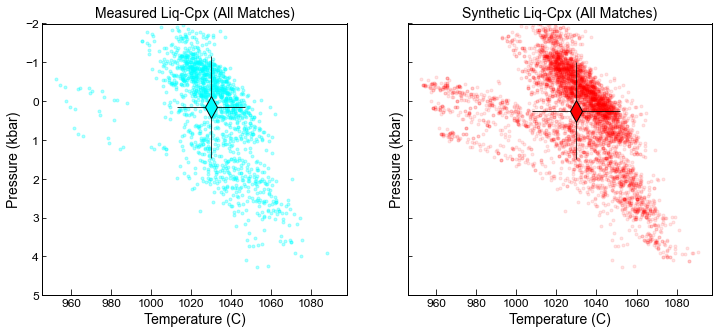

In [19]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

ax1.set_title('Measured Liq-Cpx (All Matches)')
ax1.plot(Meas_All['T_K_calc']-273.15, Meas_All['P_kbar_calc'], '.', color='cyan', alpha=0.3)


ax1.errorbar(np.nanmean(Meas_All['T_K_calc']-273.15),  np.nanmean(Meas_All['P_kbar_calc']),
             xerr=np.nanstd(Meas_All['T_K_calc']-273.15), yerr=np.nanstd(Meas_All['P_kbar_calc']),
             fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=15, mec='k', label='Pennys code', zorder=100)


#ax1.set_ylim([-2, 5])
ax1.invert_yaxis()

#ax1.set_xlim([700, 1200])
ax1.set_xlabel('Temperature (C)')
ax1.set_ylabel('Pressure (kbar)')
ax2.set_title('Synthetic Liq-Cpx (All Matches)')

ax2.plot(Syn_All['T_K_calc']-273.15, Syn_All['P_kbar_calc'], '.', color='red', alpha=0.1)
ax2.errorbar(np.nanmean(Syn_All['T_K_calc']-273.15),  np.nanmean(Syn_All['P_kbar_calc']),
             xerr=np.nanstd(Syn_All['T_K_calc']-273.15), yerr=np.nanstd(Syn_All['P_kbar_calc']),
             fmt='d', ecolor='k', elinewidth=0.8, mfc='red', ms=15, mec='k', label='Pennys code', zorder=100)


ax2.set_ylim([-2, 5])
ax2.invert_yaxis()
#ax2.set_xlim([700, 1200])

ax2.set_xlabel('Temperature (C)')
ax2.set_ylabel('Pressure (kbar)')

## Comparison to published figure in Scruggs and Putirka

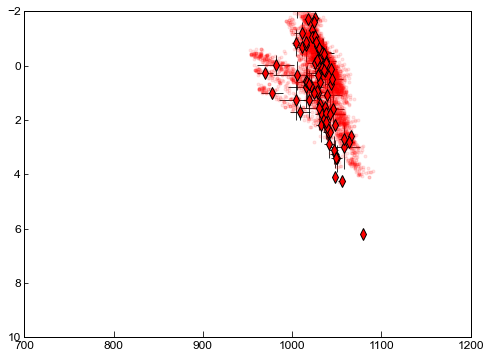

In [20]:
#
fig, ((ax1)) = plt.subplots(1, figsize=(8, 6))

ax1.plot(Syn_All['T_K_calc']-273.15, Syn_All['P_kbar_calc'], '.', color='red', alpha=0.1)

ax1.errorbar(Syn_Avs['Mean_T_K_calc']-273.15,  Syn_Avs['Mean_P_kbar_calc'],
             xerr=Syn_Avs['Std_T_K_calc'], yerr=Syn_Avs['Std_P_kbar_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='red', ms=8, mec='k', label='Pennys code')

ax1.set_xlim([700, 1200])
ax1.set_ylim([-2, 10])
ax1.invert_yaxis()

## Diagram from Scruggs and Putirka with the above plot overlain

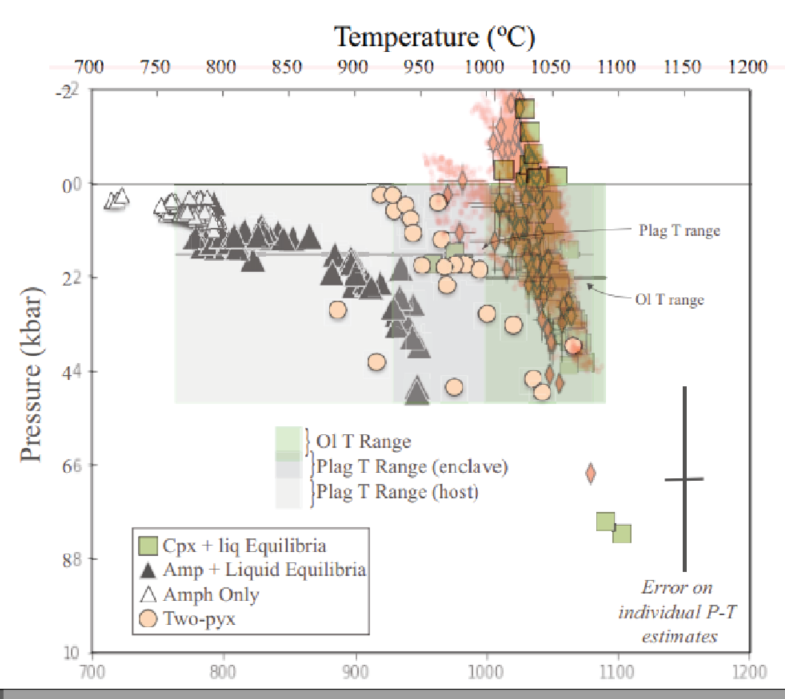